<a href="https://colab.research.google.com/github/CodeHunterOfficial/Python_Basics/blob/main/Lecture_10_2_Mpmath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mpmath
Multiple Precision math

Пакет для работы с числами с плавающей точкой со сколь угодно высокой точностью. В нём реализованы алгоритмы вычисления элементарных функций, а также большого количества специальных функций.

In [ ]:
from mpmath import *
%matplotlib inline

Точность контролируется глобальным объектом `mp`.

In [ ]:
print(mp)

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]


`prec` - число бит в мантиссе, `dps` - число значащих десятичных цифр. Если изменить один из этих атрибутов, другой изменится соответственно.

In [ ]:
mp.dps=50
print(mp)

Mpmath settings:
  mp.prec = 169               [default: 53]
  mp.dps = 50                 [default: 15]
  mp.trap_complex = False     [default: False]


`mpf` создаёт число с плавающей (multiple precision float) точкой из строки или числа.

In [ ]:
x=mpf('0.1')
print(x)

0.1


In [ ]:
x

mpf('0.10000000000000000000000000000000000000000000000000007')

А вот так делать не надо. `0.1` сначала преобразуется в число с плавающей точкой со стандартной (т.е. двойной) точностью, а потом уже оно преобразуется в `mpf`.

In [ ]:
y=mpf(0.1)
print(y)

0.1000000000000000055511151231257827021181583404541


Чтобы не потерять точность, нужно делать `mpf` из строки или из отношения целых чисел (вероятно, со знаменателем вида $10^n$).

In [ ]:
y=mpf(1)/10
print(y)

0.1


Математические константы типа $\pi$ или $e$ реализованы в виде *ленивых* объектов. Они содержат сколько-то вычисленных бит плюс алгоритм, позволяющий получить больше бит, если потребуется.

In [ ]:
pi

<pi: 3.14159~>

In [ ]:
mp.prec=53
print(pi)

3.14159265358979


In [ ]:
mp.prec=169
print(pi)

3.1415926535897932384626433832795028841971693993751


Когда объект `pi` встречается в выражении, из него делается число с текущей точностью.

In [ ]:
+pi

mpf('3.1415926535897932384626433832795028841971693993751068')

Реализованы арифметические операции и элементарные функции.

In [ ]:
sin(pi/4)**2

mpf('0.50000000000000000000000000000000000000000000000000134')

## Специальные функции

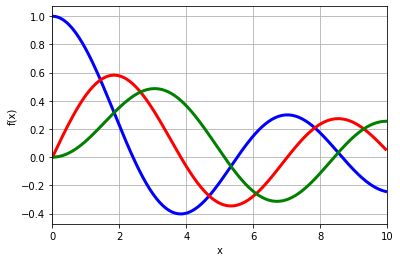

In [ ]:
plot([lambda x:besselj(0,x),
      lambda x:besselj(1,x),
      lambda x:besselj(2,x)],[0,10])

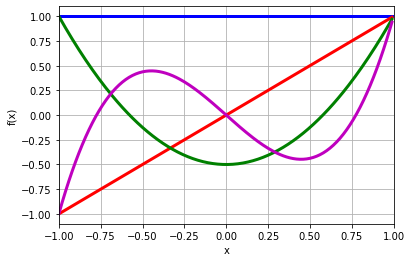

In [ ]:
plot([lambda x:legendre(0,x),
      lambda x:legendre(1,x),
      lambda x:legendre(2,x),
      lambda x:legendre(3,x)],[-1,1])

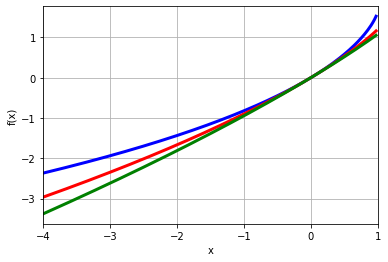

In [ ]:
plot([lambda x:polylog(2,x),
      lambda x:polylog(3,x),
      lambda x:polylog(4,x)],[-4,1])

In [ ]:
print(pi**2/zeta(2),pi**4/zeta(4))

6.0 90.0


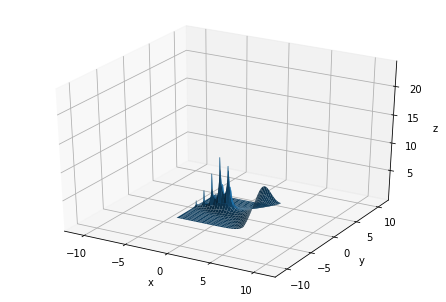

In [ ]:
splot(lambda x,y:abs(gamma(x+j*y)),[-4,4],[-4,4])

In [ ]:
gamma(1.5)/sqrt(pi)

mpf('0.5')

## Решение уравнений

Корни многочлена

In [ ]:
l=[1,0,0,0,1,1]
r=polyroots(l)
for x in r:
    print(x)

-0.75487766624669276004950889635852869189460661777279
(0.8774388331233463800247544481792643459473033088864 - 0.74486176661974423659317042860439236724016308490682j)
(0.8774388331233463800247544481792643459473033088864 + 0.74486176661974423659317042860439236724016308490682j)
(-0.5 + 0.86602540378443864676372317075293618347140262690519j)
(-0.5 - 0.86602540378443864676372317075293618347140262690519j)


In [ ]:
for x in r:
    print(polyval(l,x))

0.0
(2.672764710092195646140536467151481878815196880105e-51 - 4.6512209026900071036135543450317217153701063147101e-51j)
(2.672764710092195646140536467151481878815196880105e-51 + 4.6512209026900071036135543450317217153701063147101e-51j)
(0.0 + 0.0j)
(0.0 + 0.0j)


Решение уравнения

In [ ]:
def f(x):
    return exp(-x)-sin(x)

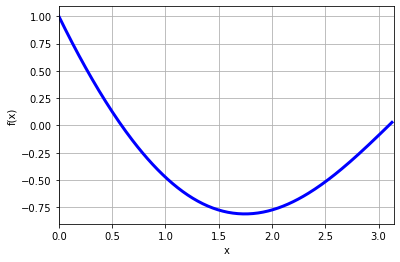

In [ ]:
plot(f,[0,pi])

In [ ]:
findroot(f,(0.5,0.7))

mpf('0.58853274398186107743245204570290368853127151610903053')

Решение системы уравнений

In [ ]:
findroot([lambda x,y:x**2+y**2-1,lambda x,y:x*y-1/4],(1,0.25))

matrix(
[['0.9659258262890682867497431997288973676339048390084'],
 ['0.25881904510252076234889883762404832834906890131993']])

## Производные

In [ ]:
diff(f,0.5)

mpf('-1.4841132216030061397200811175950101054335633325969314')

In [ ]:
diff(f,0.5,2)

mpf('1.085956198316836423877087470206751841523721503427788')

In [ ]:
diff(lambda x,y:sin(x)*cos(y),(pi,pi),(1,2))

mpf('-1.0')

## Интегралы

При вычислении этого интеграла все вычисления будут производиться с точностью, на 5 значащих цифр большей; затем она вернётся к прежней.

In [ ]:
with extradps(5):
    I=quad(lambda x:log(x)**2/(1+x),(0,1))
    print(I)

1.803085354739391428099607242267174986147479438510748322


Допустим, у нас есть причины подозревать, что этот интеграл равен $\zeta(3)$, умноженному на рациональное число (с не очень большими числителем и знаменателем). `pslq([x1,x2,...])` находит целые числа $n_1$, $n_2$, ... такие, что $n_1\,x_1 + n_2\,x_2 + \cdots = 0$. Это - метод нахождения тождеств, называемый *экспериментальной математикой*. Для этого часто требуются вычисления с очень высокой точностью.

In [ ]:
pslq([I,zeta(3)])

[-2, 3]

То есть наш интеграл равен $\frac{3}{2} \zeta(3)$. Это, конечно, не доказательство. Но если мы ещё увеличим точность вычисления интеграла, а результат `pslq` не изменится, то мы можем быть практически уверены, что этот результат верен.

Двойной интеграл:

In [ ]:
quad(lambda x,y:1/(1+x*y),[0,1],[0,1])

mpf('0.82246703342411321823620758332301259460947495060339899')

## Сумма ряда

In [ ]:
with extradps(5):
    s=nsum(lambda n:(-1)**(n-1)/n**4,(1,inf))
    print(s)

0.9470328294972459175765032344735219149279070829288860442


In [ ]:
pslq([s,pi**4])

[-720, 7]

То есть эта сумма, вероятно, равна $\frac{7}{720} \pi^4$.

## Дифференциальные уравнения

In [ ]:
a=mpf('0.2')
def f(t,x):
    global a
    return [x[1],-x[0]-2*a*x[1]]

In [ ]:
x=odefun(f,0,[1,0])

In [ ]:
x(1)

[mpf('0.59496623263788777500734762840237378880987158574261147'),
 mpf('-0.69387986210972080683187214187798497495035321299936026')]

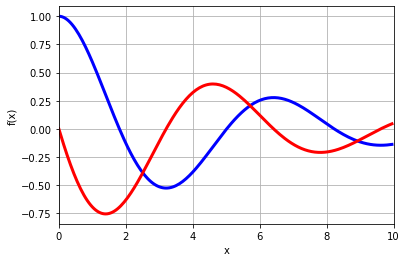

In [ ]:
plot([lambda t:x(t)[0],lambda t:x(t)[1]],[0,10])

## Матрицы

Матрицы разреженные, реализованы как словари. Квадратная матрица

In [ ]:
matrix(2)

matrix(
[['0.0', '0.0'],
 ['0.0', '0.0']])

Прямоугольная матрица

In [ ]:
M=matrix(2,3)
M

matrix(
[['0.0', '0.0', '0.0'],
 ['0.0', '0.0', '0.0']])

In [ ]:
M.rows,M.cols

(2, 3)

In [ ]:
M[0,1]=1
M

matrix(
[['0.0', '1.0', '0.0'],
 ['0.0', '0.0', '0.0']])

Операции с матрицами

In [ ]:
M1=matrix([[0,1],[1,0]])
M2=matrix([[1,0],[0,-1]])

In [ ]:
M1+M2

matrix(
[['1.0', '1.0'],
 ['1.0', '-1.0']])

In [ ]:
M1*M2

matrix(
[['0.0', '-1.0'],
 ['1.0', '0.0']])

In [ ]:
M2*M1

matrix(
[['0.0', '1.0'],
 ['-1.0', '0.0']])

In [ ]:
M1**(-1)

matrix(
[['0.0', '1.0'],
 ['1.0', '0.0']])

Решение системы линейных уравнений

In [ ]:
A=matrix([[1,2],[3,4]])
b=matrix([1,-1])
b

matrix(
[['1.0'],
 ['-1.0']])

In [ ]:
x=lu_solve(A,b)
x

matrix(
[['-3.0'],
 ['2.0']])

In [ ]:
A*x-b

matrix(
[['0.0'],
 ['0.0']])

Собственные значения и собственные векторы

In [ ]:
l,u=eig(A)
l

[mpf('-0.37228132326901432992530573410946465911013222899139797'),
 mpf('5.3722813232690143299253057341094646591101322289914067')]

In [ ]:
u

matrix(
[['-0.82456484013239376536905071707877267896095335074304', '-0.42222915041526045335929057758178658089159736117701'],
 ['0.56576746496899228472288762798052673125191630934726', '-0.92305231425019333318861560854941073593095247730112']])

Диагональная матрица

In [ ]:
L=diag(l)
L

matrix(
[['-0.3722813232690143299253057341094646591101322289914', '0.0'],
 ['0.0', '5.3722813232690143299253057341094646591101322289914']])

In [ ]:
A*u-u*L

matrix(
[['-2.0045735325691467346054023503636114091113976600788e-51', '5.3455294201843912922810729343029637576303937602101e-51'],
 ['0.0', '1.069105884036878258456214586860592751526078752042e-50']])